<a href="https://colab.research.google.com/github/ayman-metwally2020/Anomaly-Detection-/blob/main/anomaly_detection_parts_1_2_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#######################################################
#######################################################
############    COPYRIGHT - DATA SOCIETY   ############
#######################################################
#######################################################

## ANOMALY DETECTION DAY 1/ANOMALY DETECTION PART 1 ##

## NOTE: To run individual pieces of code, select the line of code and
##       press ctrl + enter for PCs or command + enter for Macs




In [1]:
#=================================================-
#### Slide 27: Loading packages  ####

import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.tree import DecisionTreeClassifier




In [10]:
#=================================================-
#### Slide 28: Directory settings  ####

# Set 'main_dir' to location of the project folder
from pathlib import Path
home_dir = Path(".").resolve()
main_dir = home_dir.parent
print(main_dir)

# Assuming your data is in a 'data' folder within the current directory
data_dir = os.path.join(str(home_dir), "data")

# If the above is not correct, you may need to manually specify the path
# For example:
# data_dir = "/path/to/your/data/folder"  # Replace with your actual path

print(data_dir)

/
/content/data


In [11]:
#=================================================-
#### Slide 29: Load the dataset  ####

paysim = pd.read_csv(os.path.join(data_dir, "paysim_transactions.csv")) # Build the full path to file
paysim.head()
paysim.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20220 entries, 0 to 20219
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            20220 non-null  int64  
 1   type            20220 non-null  object 
 2   amount          20220 non-null  float64
 3   nameOrig        20220 non-null  object 
 4   oldbalanceOrg   20220 non-null  float64
 5   newbalanceOrig  20220 non-null  float64
 6   nameDest        20220 non-null  object 
 7   oldbalanceDest  20220 non-null  float64
 8   newbalanceDest  20220 non-null  float64
 9   isFraud         20220 non-null  int64  
 10  isFlaggedFraud  20220 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 1.7+ MB


In [12]:
paysim

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,308,CASH_OUT,94270.99,C473084216,0.00,0.00,C1130422007,392411.08,486682.07,0,0
1,215,TRANSFER,1068883.00,C116497934,227.30,0.00,C321541184,4096905.34,5165788.35,0,0
2,326,TRANSFER,2485281.21,C2089305953,54940.00,0.00,C1473680645,177829.59,2663110.80,0,0
3,371,PAYMENT,2243.36,C1200351076,0.00,0.00,M1583169191,0.00,0.00,0,0
4,283,PAYMENT,5845.82,C1501258365,0.00,0.00,M1431167213,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
20215,180,CASH_IN,197412.65,C1013305532,6253963.59,6451376.24,C1881017744,1386085.05,1188672.40,0,0
20216,402,PAYMENT,511.17,C346259208,0.00,0.00,M2040811644,0.00,0.00,0,0
20217,255,CASH_IN,19535.56,C781311829,5417445.96,5436981.52,C602090862,1274374.79,1254839.23,0,0
20218,181,CASH_OUT,210443.80,C396334226,50526.00,0.00,C1748865512,0.00,210443.80,0,0


In [13]:
#=================================================-
#### Slide 30: Understand the dataset  ####

paysim.columns




Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

isFraud
0    0.98912
1    0.01088
Name: count, dtype: float64


<Axes: xlabel='isFraud'>

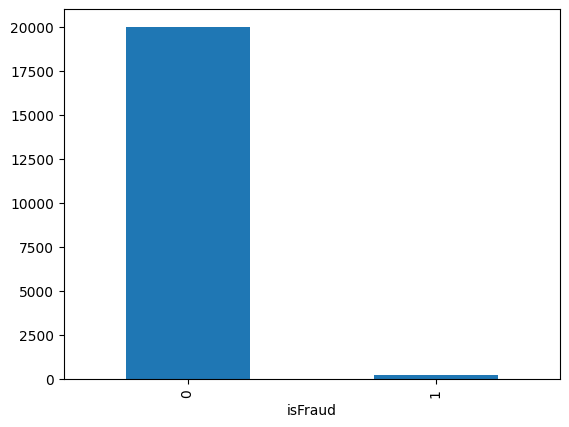

In [14]:
#=================================================-
#### Slide 31: Target of the dataset  ####

paysim['isFraud'].value_counts()

print(paysim['isFraud'].value_counts() / len(paysim))
paysim['isFraud'].value_counts().plot(kind = 'bar')




<Axes: xlabel='type'>

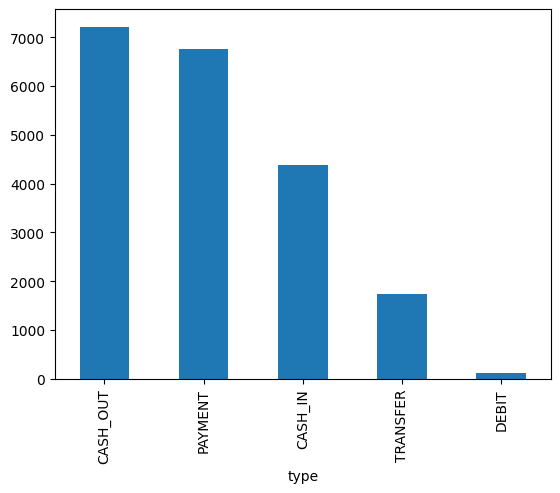

In [15]:
#=================================================-
#### Slide 32: EDA of the dataset  ####

paysim.isnull().sum()
paysim['type'].value_counts().plot(kind = 'bar')




In [16]:
#=================================================-
#### Slide 34: Subset the data  ####

# Subset variables from fraud dataset
paysim_dbscan = paysim.drop(['step', 'type','nameOrig', 'nameDest', 'isFlaggedFraud','isFraud'], axis = 1)
print(paysim_dbscan.head())




       amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  newbalanceDest
0    94270.99            0.0             0.0       392411.08       486682.07
1  1068883.00          227.3             0.0      4096905.34      5165788.35
2  2485281.21        54940.0             0.0       177829.59      2663110.80
3     2243.36            0.0             0.0            0.00            0.00
4     5845.82            0.0             0.0            0.00            0.00


In [17]:
#=================================================-
#### Slide 35: Data cleaning: NAs  ####

print(paysim_dbscan.isnull().sum())




amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
dtype: int64


In [18]:
#=================================================-
#### Slide 36: MinMaxScaler  ####

# Instantiate MinMaxScaler.
scaler = MinMaxScaler()

# Scale the dataframe.
paysim_dbscan_scaled = scaler.fit_transform(paysim_dbscan)
# Convert back to dataframe, making sure to name the columns again.
paysim_dbscan_scaled = pd.DataFrame(paysim_dbscan_scaled, columns = paysim_dbscan.columns)
print(paysim_dbscan_scaled.head())




     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  newbalanceDest
0  0.004683       0.000000             0.0        0.002937        0.003603
1  0.053102       0.000007             0.0        0.030665        0.038241
2  0.123469       0.001579             0.0        0.001331        0.019714
3  0.000111       0.000000             0.0        0.000000        0.000000
4  0.000290       0.000000             0.0        0.000000        0.000000


In [19]:
#=================================================-
#### Slide 38: DBSCAN: model   ####

# Let's run DBSCAN.
dbscan = DBSCAN(eps=0.2, min_samples = 5)
clusters = dbscan.fit_predict(paysim_dbscan_scaled)

# Check the number of clusters
unique, counts = np.unique(clusters, return_counts=True)
print(np.asarray((unique, counts)).T)




[[   -1     9]
 [    0 20211]]


In [ ]:
#=================================================-
#### Slide 39: Exercise 1  ####






In [20]:
#=================================================-
#### Slide 44: Optimal Eps determination  ####

nn_model = NearestNeighbors(n_neighbors=10)
nbrs = nn_model.fit(paysim_dbscan_scaled)
distances, indices = nbrs.kneighbors(paysim_dbscan_scaled)
distances = np.mean(distances,axis=1)
distances = np.sort(distances, axis=0)




In [22]:
!pip install kneed

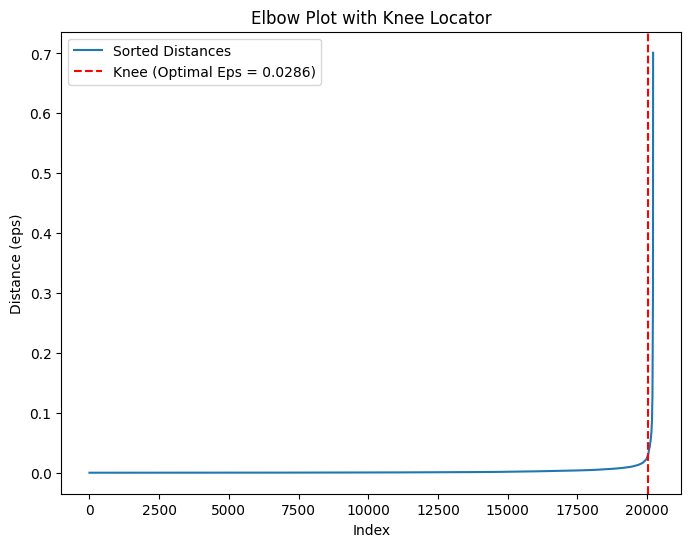

Optimal Epsilon (eps): 0.028597895900109048


In [23]:
#=================================================-
#### Slide 47: To find optimal Eps using KneeLocator  ####

from kneed import KneeLocator

# Use KneeLocator to find the optimal epsilon
knee_locator = KneeLocator(range(len(distances)), distances, curve="convex", direction="increasing")
optimal_eps = distances[knee_locator.knee]
# Plot the elbow with the knee marked
plt.figure(figsize=(8, 6))
plt.plot(range(len(distances)), distances, label="Sorted Distances")
plt.axvline(x=knee_locator.knee, color="r", linestyle="--", label=f"Knee (Optimal Eps = {optimal_eps:.4f})")
plt.xlabel('Index')
plt.ylabel('Distance (eps)')
plt.title('Elbow Plot with Knee Locator')
plt.legend()
plt.show()

print(f"Optimal Epsilon (eps): {optimal_eps}")




In [24]:
#=================================================-
#### Slide 48: DBSCAN: optimized model  ####

dbscan = DBSCAN(eps=1.15, min_samples = 10)
optimized_clusters = dbscan.fit_predict(paysim_dbscan_scaled)

# Check the number of clusters
unique, counts = np.unique(optimized_clusters, return_counts=True)
print(np.asarray((unique, counts)).T)
paysim_dbscan['cluster'] = optimized_clusters

paysim_dbscan.loc[paysim_dbscan['cluster'] >= 0,'cluster'] = 0
paysim_dbscan.loc[paysim_dbscan['cluster'] == -1,'cluster'] = 1




[[    0 20220]]


In [25]:
#=================================================-
#### Slide 49: DBSCAN: Model Evaluation  ####

from sklearn.metrics import confusion_matrix

# Create confusion matrix for DBSCAN
y_true = paysim['isFraud']  # True labels
y_pred = paysim_dbscan['cluster']  # Cluster predictions (0: inlier, 1: anomaly)

conf_matrix = confusion_matrix(y_true, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Breakdown the confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()




Confusion Matrix:
[[20000     0]
 [  220     0]]


In [26]:
#=================================================-
#### Slide 50: DBSCAN: Accuracy Evaluation  ####

# Accuracy
accuracy = (tp + tn) / (tp + tn + fp + fn)
print(f"Accuracy: {accuracy:.2f}")

# True Positive Rate (TPR) or Recall
tpr = tp / (tp + fn)
print(f"True Positive Rate (TPR): {tpr:.2f}")

# True Negative Rate (TNR)
tnr = tn / (tn + fp)
print(f"True Negative Rate (TNR): {tnr:.2f}")




Accuracy: 0.99
True Positive Rate (TPR): 0.00
True Negative Rate (TNR): 1.00


Text(0, 0.5, 'Origin new balance after transaction')

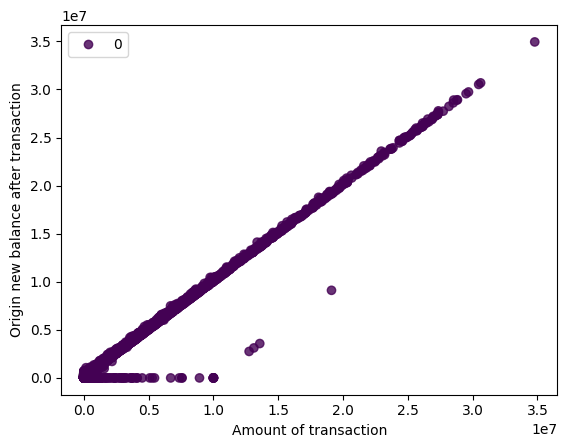

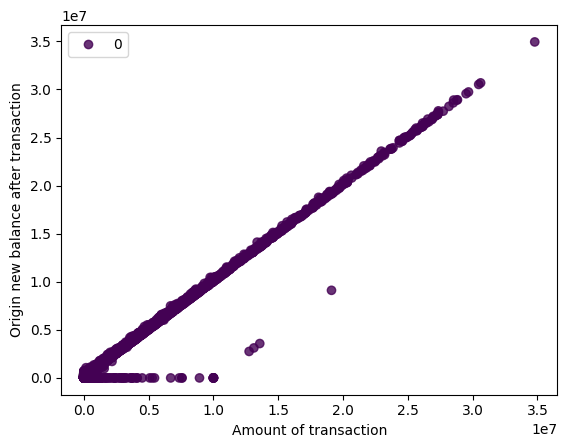

In [27]:
#=================================================-
#### Slide 51: Visualize the Anomalies  ####

fig, ax = plt.subplots()
sc = ax.scatter(paysim_dbscan['oldbalanceOrg'], paysim_dbscan['newbalanceOrig'], c = paysim_dbscan['cluster'], alpha = 0.8)
ax.legend(*sc.legend_elements())
plt.xlabel('Amount of transaction')
plt.ylabel('Origin new balance after transaction')
fig, ax = plt.subplots()
sc = ax.scatter(paysim_dbscan['oldbalanceOrg'], paysim_dbscan['newbalanceOrig'], c = paysim_dbscan['cluster'], alpha = 0.8)
ax.legend(*sc.legend_elements())
plt.xlabel('Amount of transaction')
plt.ylabel('Origin new balance after transaction')




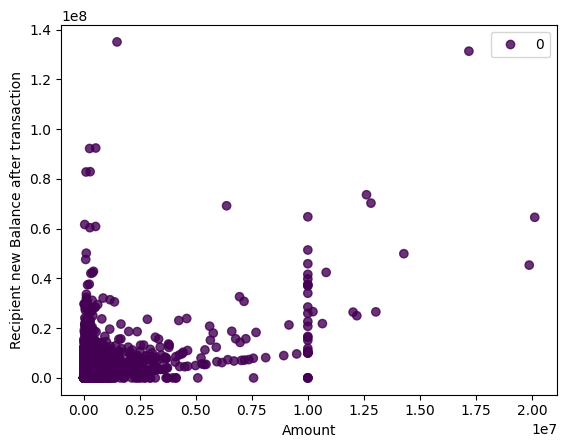

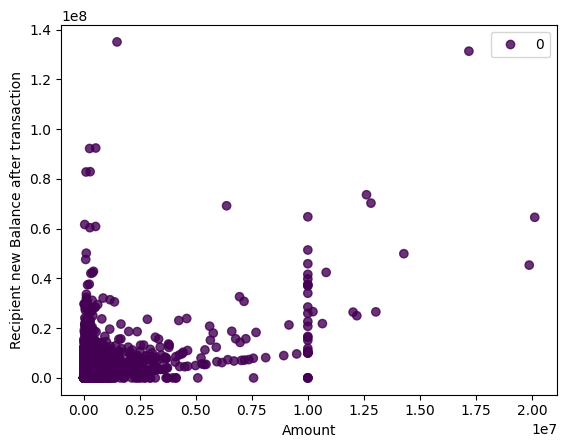

In [28]:
#=================================================-
#### Slide 52: Visualize the Anomalies  ####

fig, ax = plt.subplots()
sc = ax.scatter(paysim_dbscan['amount'], paysim_dbscan['newbalanceDest'], c = paysim_dbscan['cluster'], alpha = 0.8)
ax.legend(*sc.legend_elements())
plt.xlabel('Amount')
plt.ylabel('Recipient new Balance after transaction')
plt.show()
fig, ax = plt.subplots()
sc = ax.scatter(paysim_dbscan['amount'], paysim_dbscan['newbalanceDest'], c = paysim_dbscan['cluster'], alpha = 0.8)
ax.legend(*sc.legend_elements())
plt.xlabel('Amount')
plt.ylabel('Recipient new Balance after transaction')
plt.show()




In [ ]:
#=================================================-
#### Slide 55: Exercise 2  ####




#######################################################
####  CONGRATULATIONS ON COMPLETING THIS MODULE!   ####
#######################################################


In [29]:
#######################################################
#######################################################
############    COPYRIGHT - DATA SOCIETY   ############
#######################################################
#######################################################

## ANOMALY DETECTION DAY 1/ANOMALY DETECTION PART 2 ##

## NOTE: To run individual pieces of code, select the line of code and
##       press ctrl + enter for PCs or command + enter for Macs




In [55]:
#=================================================-
#### Slide 4: Loading packages  ####

import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.tree import DecisionTreeClassifier




In [56]:
#=================================================-
#### Slide 5: Directory settings  ####

# Set 'main_dir' to location of the project folder
from pathlib import Path
home_dir = Path(".").resolve()
main_dir = home_dir.parent
print(main_dir)

# Assuming your data is in a 'data' folder within the current directory
data_dir = os.path.join(str(home_dir), "data")

# If the above is not correct, you may need to manually specify the path
# For example:
# data_dir = "/path/to/your/data/folder"  # Replace with your actual path

print(data_dir)




/
/content/data


In [58]:
# Import necessary libraries
import os
import pandas as pd
from pathlib import Path

# Set 'main_dir' to the location of the project folder
home_dir = Path(".").resolve()
main_dir = home_dir.parent
print(f"Main directory: {main_dir}")

# Assuming your data is in a 'data' folder within the current directory
data_dir = os.path.join(str(home_dir), "data")

# If the above is not correct, you may need to manually specify the path
# Example of manual specification:
# data_dir = "/content/data"  # Replace with your actual path

print(f"Data directory: {data_dir}")

# Check if the file exists in the specified directory
file_path = os.path.join(data_dir, "PJME_hourly.csv")

# Verify the file existence
if os.path.exists(file_path):
    # Load the CSV file into a DataFrame
    pjm_energy = pd.read_csv(file_path)
    print("File loaded successfully.")
else:
    raise FileNotFoundError(f"File not found: {file_path}")

# Show the first few rows of the data
pjm_energy.head()


Main directory: /
Data directory: /content/data
File loaded successfully.


,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


In [59]:
#=================================================-
#### Slide 7: Time series data: preprocessing  ####

pjm_energy['Datetime'] = pd.to_datetime(pjm_energy['Datetime'])
pjm_energy.info()
pjm_energy = pjm_energy[pjm_energy['Datetime'] > '2018-01-01 00:00:00']
pjm_energy.shape




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145366 entries, 0 to 145365
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   Datetime  145366 non-null  datetime64[ns]
 1   PJME_MW   145366 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.2 MB


(5135, 2)

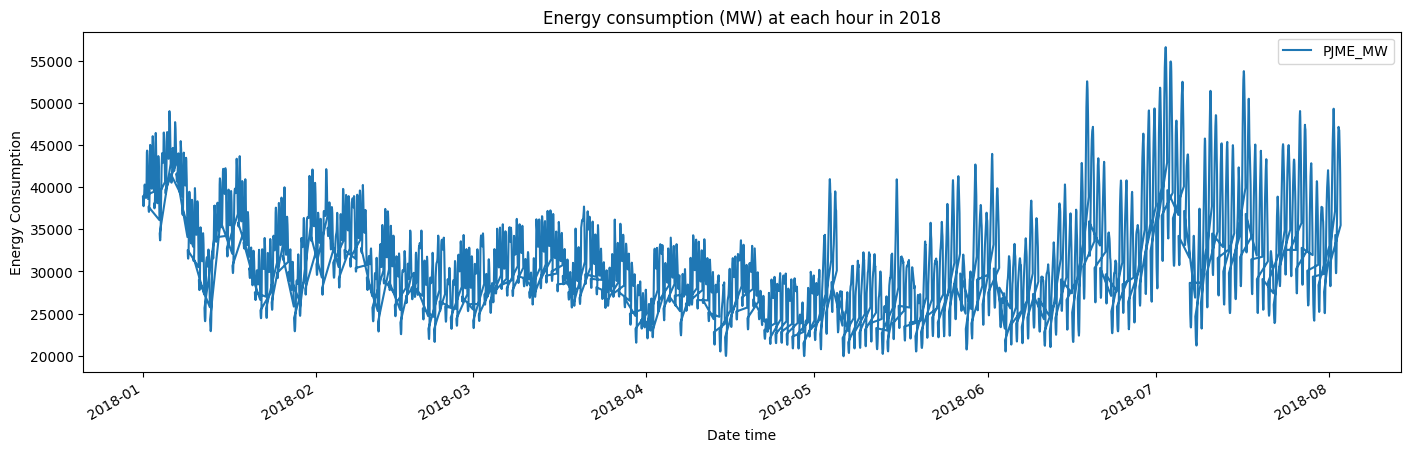

In [60]:
#=================================================-
#### Slide 8: Visualize the data: line plot  ####

pjm_energy.plot(x='Datetime', y='PJME_MW', figsize=(17,5))
plt.xlabel('Date time')
plt.ylabel('Energy Consumption')
plt.title('Energy consumption (MW) at each hour in 2018')
plt.show()




In [61]:
#=================================================-
#### Slide 9: Scaling on time series data  ####

scaler = StandardScaler()

# Scale the dataframe.
pjm_energy_scaled = scaler.fit_transform(pd.DataFrame(pjm_energy['PJME_MW']))
print(pjm_energy_scaled)




[[ 0.39848118]
 [ 0.04984823]
 [-0.19717311]
 ...
 [ 1.69156064]
 [ 1.33512366]
 [ 1.08730599]]


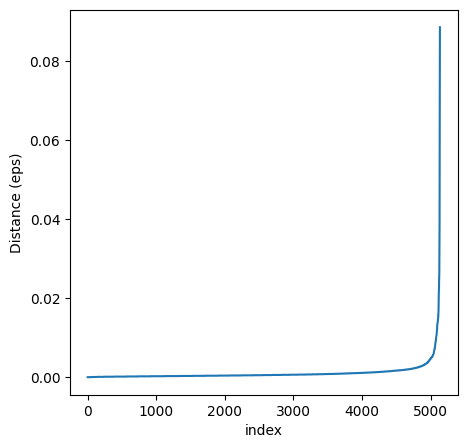

In [62]:
#=================================================-
#### Slide 10: Optimal Eps determination  ####


nn_model = NearestNeighbors(n_neighbors=5)
nbrs = nn_model.fit(pjm_energy_scaled)

distances, indices = nbrs.kneighbors(pjm_energy_scaled)

distances = np.mean(distances,axis=1)
distances = np.sort(distances, axis=0)

plt.figure(figsize=(5, 5))
plt.plot(distances)

plt.xlabel('index')
plt.ylabel('Distance (eps)')

plt.show()




Optimal Epsilon (eps): 0.00732622924114521


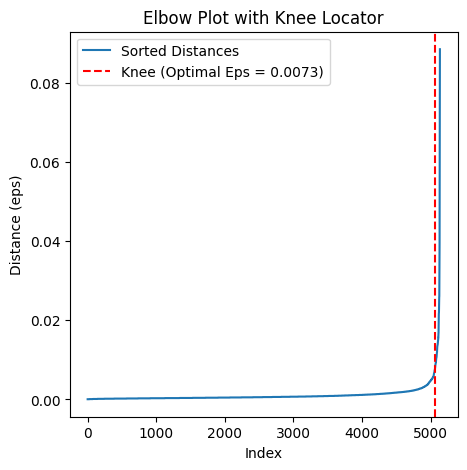

In [63]:
#=================================================-
#### Slide 11: Optimal Eps Determination Using KneeLocator  ####

from kneed import KneeLocator

# Use KneeLocator to find the optimal epsilon

knee_locator = KneeLocator(range(len(distances)), distances, curve="convex", direction="increasing")
optimal_eps = distances[knee_locator.knee]
print(f"Optimal Epsilon (eps): {optimal_eps}")

# Plot the k-distance curve with the knee point highlighted

plt.figure(figsize=(5, 5))
plt.plot(distances, label="Sorted Distances")
plt.axvline(x=knee_locator.knee, color="r", linestyle="--", label=f"Knee (Optimal Eps = {optimal_eps:.4f})")

plt.xlabel('Index')
plt.ylabel('Distance (eps)')
plt.title('Elbow Plot with Knee Locator')
plt.legend()
plt.show()




In [64]:
#=================================================-
#### Slide 12: DBSCAN on time series data  ####

dbscan_energy = DBSCAN(eps = 0.0073, metric='euclidean', min_samples=5, n_jobs = -1)

pjm_energy['anomaly'] =  dbscan_energy.fit_predict(pd.DataFrame(pjm_energy_scaled))




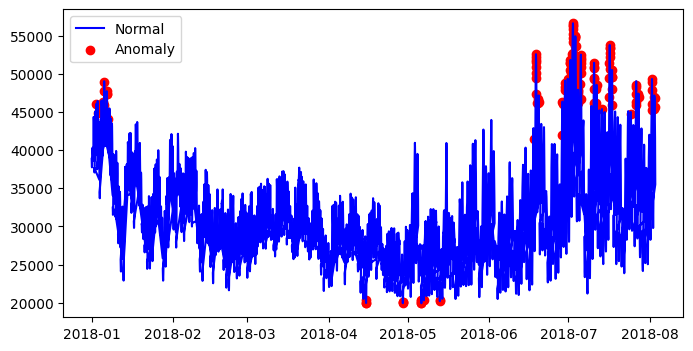

In [65]:
#=================================================-
#### Slide 13: Visualize anomalies  ####

# visualization
fig, ax = plt.subplots(figsize=(8,4))

# Anomalies detected have value = -1
a = pjm_energy.loc[pjm_energy['anomaly'] == -1, ['Datetime', 'PJME_MW']] #anomaly

# Plotting the anomalies
ax.plot(pjm_energy['Datetime'], pjm_energy['PJME_MW'], color='blue', label = 'Normal')
ax.scatter(a['Datetime'],a['PJME_MW'], color='red', label = 'Anomaly')

plt.legend()
plt.show()




In [66]:
#=================================================-
#### Slide 14: Anomalies detected  ####

pjm_energy[pjm_energy['anomaly'] == -1]




,Datetime,PJME_MW,anomaly
140243,2018-08-02 13:00:00,45372.0,-1
140246,2018-08-02 16:00:00,46989.0,-1
140248,2018-08-02 18:00:00,46760.0,-1
140249,2018-08-02 19:00:00,45641.0,-1
140268,2018-08-01 14:00:00,45313.0,-1
...,...,...,...
145266,2018-01-05 21:00:00,47788.0,-1
145289,2018-01-04 20:00:00,45896.0,-1
145290,2018-01-04 21:00:00,45377.0,-1
145300,2018-01-03 07:00:00,44802.0,-1


In [ ]:
#=================================================-
#### Slide 16: Exercise 3  ####






In [67]:
#=================================================-
#### Slide 29: Prepare a dataset for decision tree modeling  ####

paysim = pd.read_csv(str(data_dir)+"/paysim_transactions.csv")
# Drop columns.
paysim = paysim.drop(['step', 'nameOrig', 'nameDest', 'isFlaggedFraud'], axis = 1)
paysim.columns




Index(['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud'],
      dtype='object')

In [68]:
#=================================================-
#### Slide 30: Convert categorical to dummy  ####

paysim['type'] = pd.Categorical(paysim['type'])
paysim['type'] = paysim['type'].cat.codes
colname = pd.get_dummies(paysim['type'], prefix = 'type', drop_first = True)
paysim = pd.concat([paysim, colname], axis = 1)
paysim.drop(['type'], axis = 1, inplace = True)

paysim.columns




Index(['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'type_1', 'type_2', 'type_3', 'type_4'],
      dtype='object')

In [75]:
#=================================================-
#### Slide 31: Decision tree classification  ####

# Select predictors and target.
y = paysim['isFraud']
X = paysim.drop(['isFraud'], axis = 1)

# Build a logistic regression model.
np.random.seed(1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)
dtree = DecisionTreeClassifier(max_depth = 10)
dtree.fit(X_train, y_train)




DecisionTreeClassifier(max_depth=10)

In [76]:
#=================================================-
#### Slide 32: Predict the target  ####

dtree_y_train_pred = dtree.predict(X_train)
dtree_y_test_pred = dtree.predict(X_test)
dtree_accuracy = metrics.accuracy_score(y_test, dtree_y_test_pred)
print("Accuracy of test data:\t", dtree_accuracy)
# ROC AUC value.
roc_auc_score(y_test, dtree_y_test_pred)




Accuracy of test data:	 0.9960435212660732


0.8356542010733131

In [77]:
#=================================================-
#### Slide 33: Confusion matrix of training data  ####

print('Confusion Matrix - Training Dataset')
print(pd.crosstab(y_train, dtree_y_train_pred, rownames = ['True'], colnames = ['Predicted'], margins = True))
print('Percentage of accurate fraud cases is ', 133/153)




Confusion Matrix - Training Dataset
Predicted      0    1    All
True                        
0          13998    3  14001
1             20  133    153
All        14018  136  14154
Percentage of accurate fraud cases is  0.869281045751634


In [78]:
#=================================================-
#### Slide 34: Confusion matrix of test data  ####

print('Confusion Matrix - Testing Dataset')
print(pd.crosstab(y_test, dtree_y_test_pred, rownames = ['True'], colnames = ['Predicted'], margins = True))
print('Percentage of accurate fraud cases is', 45/67)




Confusion Matrix - Testing Dataset
Predicted     0   1   All
True                     
0          5997   2  5999
1            22  45    67
All        6019  47  6066
Percentage of accurate fraud cases is 0.6716417910447762


In [79]:
#=================================================-
#### Slide 37: Find TPR and TNR  ####

tn, fp, fn, tp = confusion_matrix(y_test, dtree_y_test_pred).ravel()

# Find the TNR.
non_fraud_eval = tn / (tn + fp)
print(non_fraud_eval)
# Find the TPR.
fraud_eval = tp / (tp + fn)
print(fraud_eval)




0.9996666111018503
0.6716417910447762


In [80]:
#=================================================-
#### Slide 38: Save the metric  ####

performance_df = pd.DataFrame(columns = ['model_name', 'TPR', 'TNR'])

s = pd.Series(['Decision_tree_baseline', fraud_eval, non_fraud_eval],
              index=['model_name', 'TPR', 'TNR'])
performance_df = pd.concat([performance_df, pd.DataFrame([s])], ignore_index=True)
performance_df




<ipython-input-80-5ab397a469a0>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  performance_df = pd.concat([performance_df, pd.DataFrame([s])], ignore_index=True)


,model_name,TPR,TNR
0,Decision_tree_baseline,0.671642,0.999667


In [ ]:
#=================================================-
#### Slide 40: Exercise 4  ####






(14154, 9)
(28002, 9)


<Axes: xlabel='isFraud'>

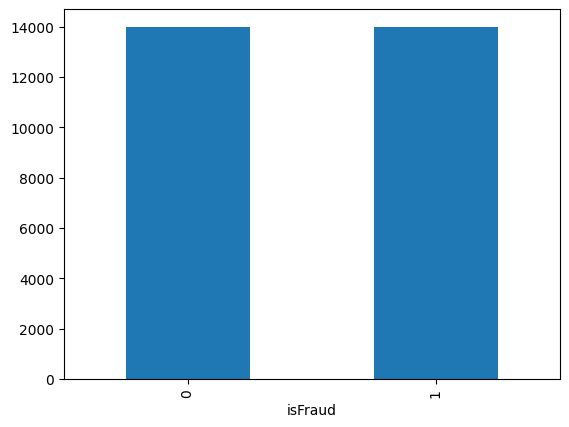

In [81]:
#=================================================-
#### Slide 49: SMOTE in fraud dataset  ####

sm = SMOTE(random_state = 1)
X_train_new, y_train_new = sm.fit_resample(X_train, y_train)
# Shape of X_train.
print(X_train.shape)
# Print shape of X_train_new.
print(X_train_new.shape)
# Double check that the data has been balanced.
pd.Series(y_train_new).value_counts().plot.bar()




In [82]:
#=================================================-
#### Slide 50: Fit the model and predict  ####

# Fit the model.
dtree.fit(X_train_new, y_train_new)

# Prediction for training data.
train_pred_sm = dtree.predict(X_train_new)

# Prediction for the test data.
test_pred_sm = dtree.predict(X_test)
train_pred_sm = dtree.predict(X_train_new)




In [83]:
#=================================================-
#### Slide 51: Confusion matrix of training data  ####

print('Confusion Matrix - Training Dataset')
print(pd.crosstab(y_train_new, train_pred_sm, rownames = ['True'], colnames = ['Predicted'], margins = True))
print('Percentage of accurate fraud cases: ', 13999/14001)




Confusion Matrix - Training Dataset
Predicted      0      1    All
True                          
0          13935     66  14001
1              1  14000  14001
All        13936  14066  28002
Percentage of accurate fraud cases:  0.9998571530604957


In [84]:
#=================================================-
#### Slide 52: Confusion matrix of test data  ####

print('Confusion Matrix - Testing Dataset')
print(pd.crosstab(y_test, test_pred_sm, rownames = ['True'], colnames = ['Predicted'], margins = True))
print('Percentage of accurate fraud cases ', 58/67)




Confusion Matrix - Testing Dataset
Predicted     0    1   All
True                      
0          5954   45  5999
1            10   57    67
All        5964  102  6066
Percentage of accurate fraud cases  0.8656716417910447


In [85]:
#=================================================-
#### Slide 53: Find TPR and TNR and save  ####

# Find TPR and TNR and save the result.
tn, fp, fn, tp = confusion_matrix(y_test, test_pred_sm).ravel()
non_fraud_eval = tn / (tn + fp)
print(non_fraud_eval)
fraud_eval = tp / (tp + fn)
print(fraud_eval)




0.9924987497916319
0.8507462686567164


In [86]:
#=================================================-
#### Slide 54: Add scores to the performance dataframe  ####

s = pd.Series(['SMOTE', fraud_eval, non_fraud_eval],
              index=['model_name', 'TPR', 'TNR'])
performance_df = pd.concat([performance_df, pd.DataFrame([s])], ignore_index=True)
performance_df
pickle.dump(performance_df, open(str(data_dir) + "/performance_anomalies.sav","wb"))




In [ ]:
#=================================================-
#### Slide 56: Exercise 5  ####




#######################################################
####  CONGRATULATIONS ON COMPLETING THIS MODULE!   ####
#######################################################
